In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
 df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0) #Keling, amaliyot uchun ma'lumotlar yuklab olamiz.
df.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


In [ ]:
df.shape

(59, 4)

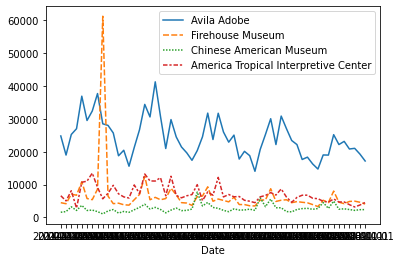

In [ ]:
sns.lineplot(data=df)
plt.show()

Ahamiyat bering, `seaborn` chiziqlarning rangi, shakli qo'shimcha ma'lumotlarni avtomat qo'yib ketdi.

Solishtirish uchun, quyida to'g'ridan-to'g'ri matplotlib yordamida chizilgan grafikni ko'rishingiz mumkin.

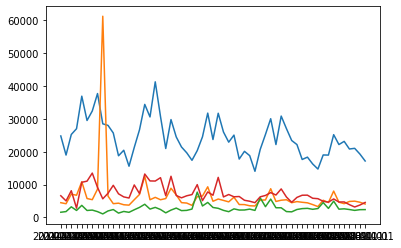

In [ ]:
plt.plot(df)
plt.show()

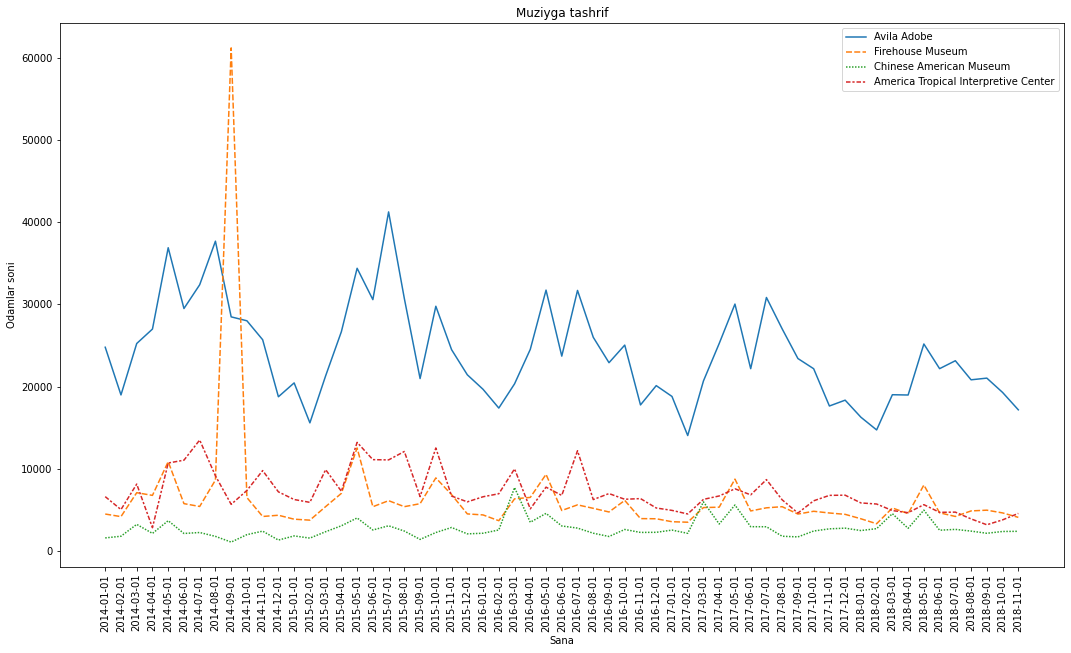

In [ ]:
plt.figure(figsize=(18,10))
plt.title("Muziyga tashrif")
plt.xlabel("Sana")
plt.ylabel("Odamlar soni")
plt.xticks(rotation=90)
sns.lineplot(data=df)
plt.show()

## Ustunli grafik. sns.barplot()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # agar seaborn o'rnatilmagan bo'lsa pip install seaborn

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/uzbekistan.csv", index_col=0)
df.columns = ['maydon','aholi']
df

,maydon,aholi
Boʻlinishi,,
Andijon viloyati,4200.0,1899000.0
Buxoro viloyati,39400.0,1384700.0
Fargʻona viloyati,6800.0,2597000.0
Jizzax viloyati,20500.0,910500.0
Xorazm viloyati,6300.0,1200000.0
Namangan viloyati,7900.0,1862000.0
Navoiy viloyati,110800.0,767500.0
Qashqadaryo viloyati,28400.0,2029000.0
Qoraqalpogʻiston Respublikasi,160000.0,1200000.0


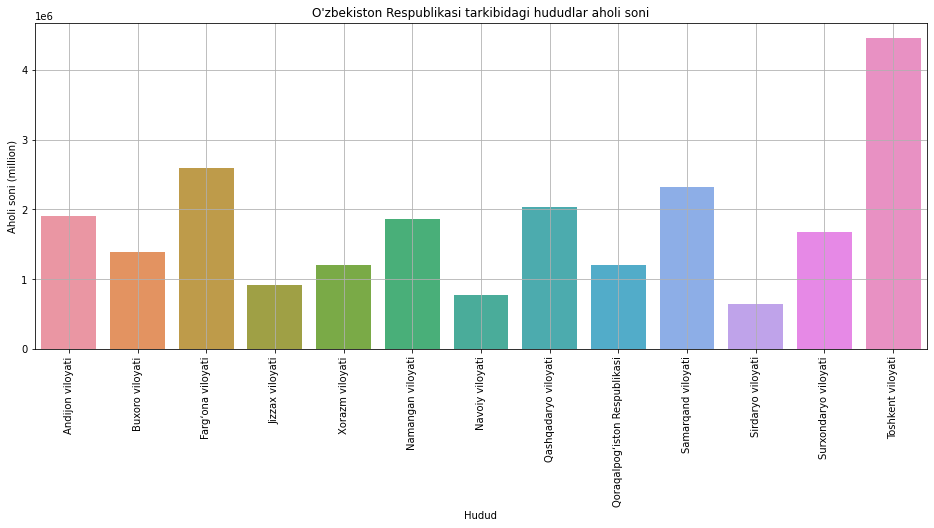

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x=df.index, y=df['aholi'])

plt.title("O'zbekiston Respublikasi tarkibidagi hududlar aholi soni")
plt.xlabel("Hudud")
plt.ylabel("Aholi soni (million)")
plt.grid() # Chizmaga gorizontal va vertikal chiziqlar (setka) qo'shish
plt.xticks(rotation=90)
plt.show()

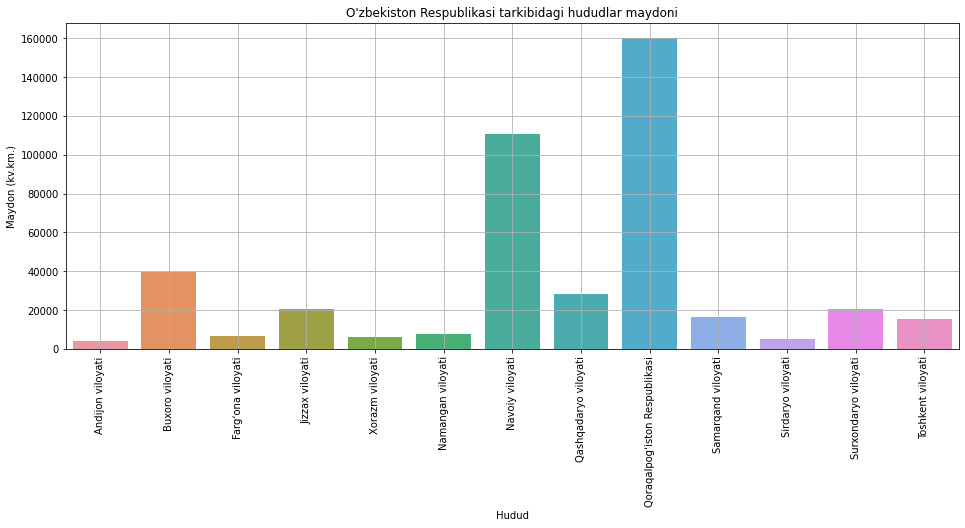

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x=df.index, y=df['maydon'])

plt.title("O'zbekiston Respublikasi tarkibidagi hududlar maydoni")
plt.xlabel("Hudud")
plt.ylabel("Maydon (kv.km.)")
plt.grid() # Chizmaga gorizontal va vertikal chiziqlar (setka) qo'shish
plt.xticks(rotation=90)
plt.show()

## Heatmap

Keling endi yangi jadval o'qiymiz. Quyidagi jadvalda AQSHdagi ba'zi muzeylarga turli sanalarda tashrif buyurganlar soni saqlangan. Biz faqatgina birinchi muzey uchun qiymatlarni o'qiymi ( `usecols=[0,1]`)

In [ ]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0, parse_dates=[0], usecols=[0,1])
df.head()

,Avila Adobe
Date,
2014-01-01,24778
2014-02-01,18976
2014-03-01,25231
2014-04-01,26989
2014-05-01,36883


Keling, df indeksidagi qiymatlarni ustunini `datetime` formatiga o'tkazib olamiz

In [ ]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

Ma'lumotlarni yil va oy bo'yicha ajratamiz. 

In [ ]:
df['month'] = [i.month for i in df.index]
df['year'] = [i.year for i in df.index]
df.head()

,Avila Adobe,month,year
Date,,,
2014-01-01,24778,1,2014
2014-02-01,18976,2,2014
2014-03-01,25231,3,2014
2014-04-01,26989,4,2014
2014-05-01,36883,5,2014


In [ ]:
df.groupby(['month','year']).max().head(10)

Avila Adobe
month year             
1     2014        24778
      2015        20438
      2016        19659
      2017        18792
      2018        16265
2     2014        18976
      2015        15578
      2016        17378
      2017        14035
      2018        14718

In [ ]:
df_m = df.groupby(['month','year']).max().unstack(level=0)
df_m.head()

Avila Adobe                                                        \
month          1        2        3        4        5        6        7    
year                                                                      
2014      24778.0  18976.0  25231.0  26989.0  36883.0  29487.0  32378.0   
2015      20438.0  15578.0  21297.0  26670.0  34383.0  30569.0  41242.0   
2016      19659.0  17378.0  20322.0  24521.0  31728.0  23696.0  31689.0   
2017      18792.0  14035.0  20680.0  25234.0  30029.0  22169.0  30831.0   
2018      16265.0  14718.0  19001.0  18966.0  25173.0  22171.0  23136.0   

                                                    
month       8        9        10       11       12  
year                                                
2014   37680.0  28473.0  27995.0  25691.0  18754.0  
2015   30700.0  20967.0  29764.0  24483.0  21426.0  
2016   25987.0  22897.0  25040.0  17760.0  20107.0  
2017   27009.0  23403.0  22164.0  17629.0  18339.0  
2018   20815.0  21020.0  19280.0  17163.0      NaN

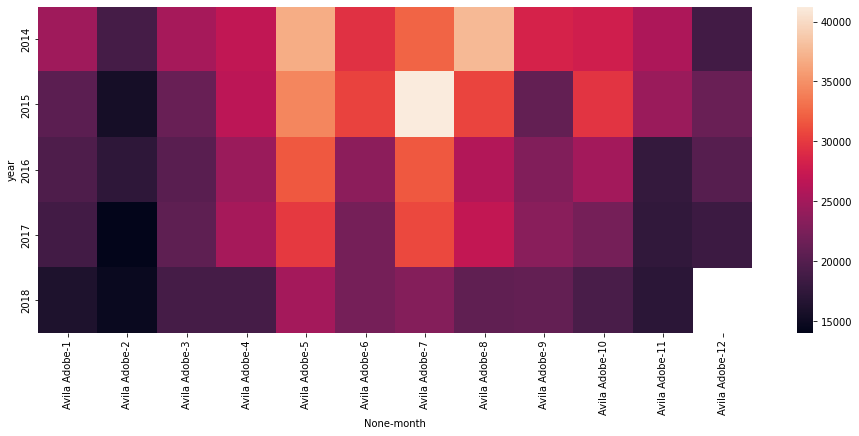

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(data=df_m)
plt.show()

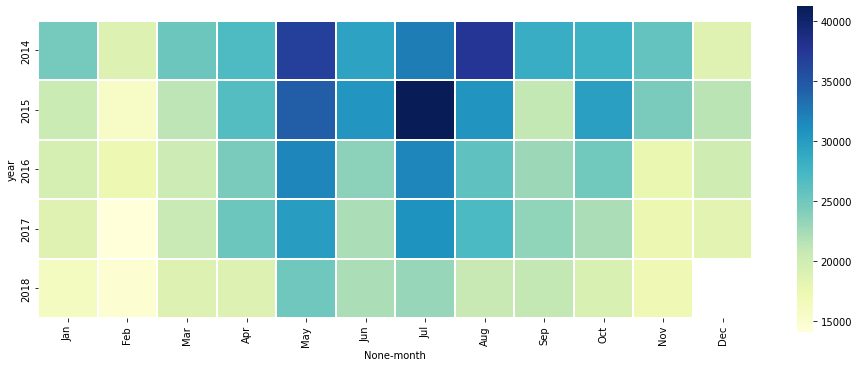

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(data=df_m, cmap="YlGnBu", linewidths=1, square=True)
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
plt.show()

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/flight_delays.csv")
df.head()

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


Yuqoridagi jadval turli oylarda turli aviakompaniyalarga tegishli samolyotlar  o'rtacha necha minutga kechikkani ko'rsatilgan**<sup>*</sup>** (har bir ustun bu aviakompaniya nomi qisqartmasi).

<sub>*manfiy qiymat samolyot erta kelganini anglatadi.</sub>

Biz alohida aviakompaniya uchun oyma-oy qiymatlarni ustunli grafik ko'rinishida chiqarishimiz mumkin:

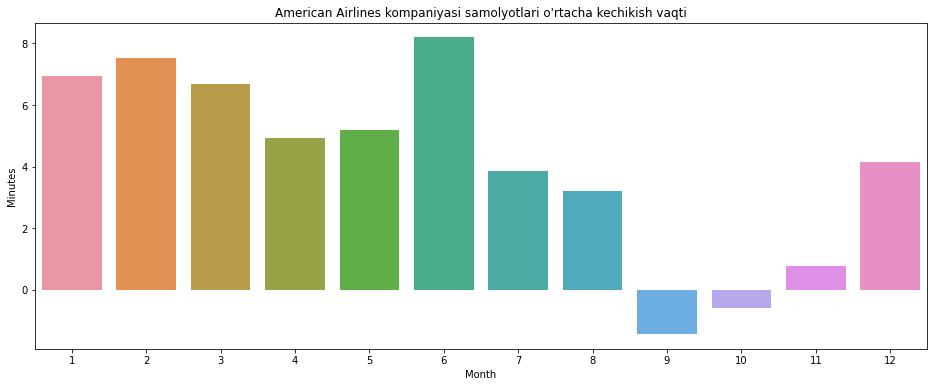

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['Month'], y=df['AA'])
plt.title("American Airlines kompaniyasi samolyotlari o'rtacha kechikish vaqti")
plt.ylabel("Minutes")
plt.show()  #Ko'rib turganingizdek, bunday grafikni tushunish o'ziga yarasha qiyinchilik tug'diradi, bu yerda bizga yana `heatmap` grafigi yordamga keladi:

Keling endi bir nechta aviakompaniyalarni yonma-yon solishtiramiz. Buning uchun jadvalimizni shakl o'zgartirishimiz kerak. 

`Pandas`da df shaklini o'zgratirish uchun `reshape` yoki `melt` funksiyasidan foydalanishimiz mumkin. 

`melt` funksiyasi jadvlani eniga uzundan bo'yiga uzun holatga olib kelishda qo'llaniladi. Bunda df dagi bir nechta ustunlarni yagona `variable` ustuniga keltirish mumkin. Qiymatlar esa har bir `variable` uchun `value` ustunida ko'rsatiladi. 

Tushunarli bo'lishi uchun quyidagi misolga ahamiyat bering. Bu misolda biz AA va MQ aviakompaniyalari uchun ma'lumotlarni ajratib olganmiz.

![](https://i.imgur.com/t9GxYtQ.png)
